In [2]:
import pandas as pd

In [6]:
ipl = pd.read_csv('deliveries.csv')

In [8]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [10]:
# Filter deliveries faced by a particular batsman (e.g., 'V Kohli')
kohli_deliveries = ipl[ipl['batsman'] == 'V Kohli']
kohli_deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [12]:
batsman_runs = ipl.groupby('batsman')['batsman_runs'].sum().reset_index()
batsman_runs = batsman_runs.sort_values(by='batsman_runs', ascending=False)
batsman_runs.head(10)  # Display top 10 batsmen by runs


,batsman,batsman_runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632
92,CH Gayle,4560
290,MS Dhoni,4477
384,RV Uthappa,4446
26,AB de Villiers,4428
147,G Gambhir,4223


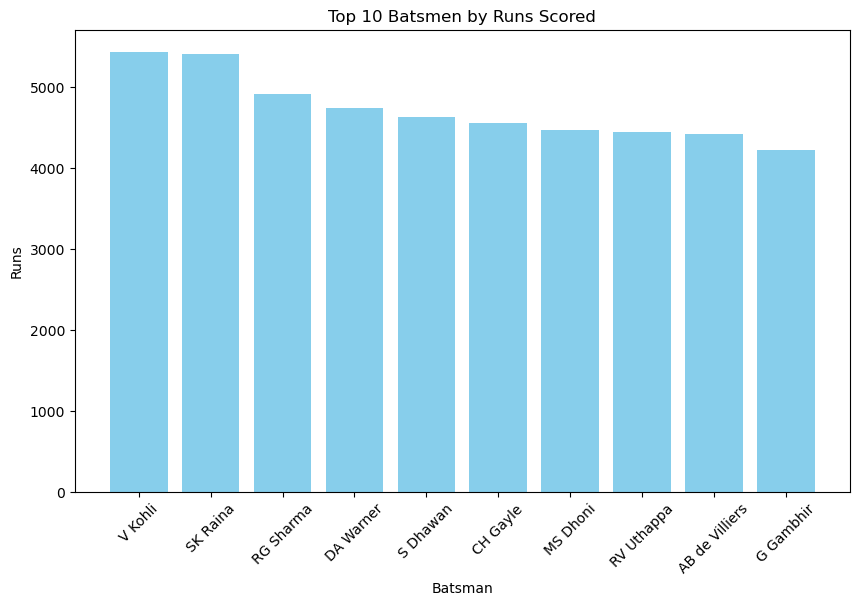

In [14]:
import matplotlib.pyplot as plt

# Top 10 batsmen by runs
plt.figure(figsize=(10, 6))
plt.bar(batsman_runs['batsman'][:10], batsman_runs['batsman_runs'][:10], color='skyblue')
plt.title('Top 10 Batsmen by Runs Scored')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Save the top 10 batsmen as a new file
batsman_runs[:10].to_csv('top_10_batsmen.csv', index=False)


In [18]:
player_name = 'V Kohli'
player_data = ipl[ipl['batsman'] == player_name]


In [20]:
team_runs = ipl.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# Display the top 10 results
team_runs.head(10)


,match_id,batting_team,total_runs
0,1,Royal Challengers Bangalore,172
1,1,Sunrisers Hyderabad,207
2,2,Mumbai Indians,184
3,2,Rising Pune Supergiant,187
4,3,Gujarat Lions,183
5,3,Kolkata Knight Riders,184
6,4,Kings XI Punjab,164
7,4,Rising Pune Supergiant,163
8,5,Delhi Daredevils,142
9,5,Royal Challengers Bangalore,157


In [22]:
# Filter deliveries where a dismissal occurred
wicket_data = ipl[ipl['dismissal_kind'].notnull()]

# Count dismissals for each bowler
bowler_wickets = wicket_data.groupby('bowler')['dismissal_kind'].count().reset_index()
bowler_wickets = bowler_wickets.sort_values(by='dismissal_kind', ascending=False)

# Display top 10 bowlers
bowler_wickets.head(10)


,bowler,dismissal_kind
294,SL Malinga,188
84,DJ Bravo,168
6,A Mishra,165
113,Harbhajan Singh,161
231,PP Chawla,156
48,B Kumar,141
236,R Ashwin,138
300,SP Narine,137
330,UT Yadav,136
247,R Vinay Kumar,127


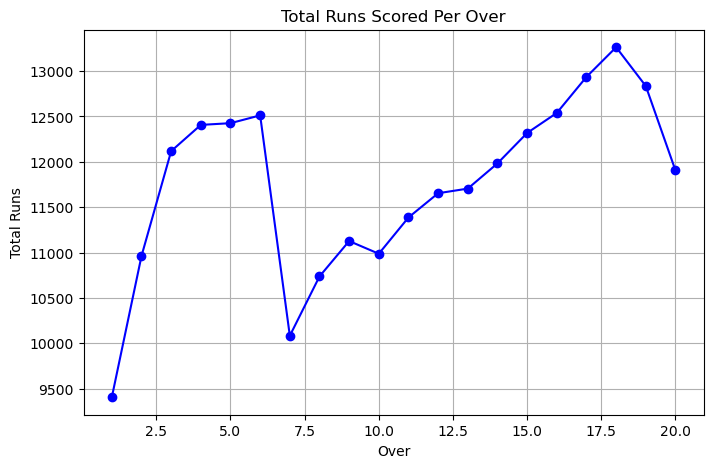

In [24]:
# Group by over to get the total runs per over
runs_per_over = ipl.groupby('over')['total_runs'].sum().reset_index()

# Plot runs scored in each over
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(runs_per_over['over'], runs_per_over['total_runs'], marker='o', color='blue')
plt.title('Total Runs Scored Per Over')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.grid(True)
plt.show()


In [26]:
# Calculate total runs and balls faced by each batsman
batsman_stats = ipl.groupby('batsman').agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).reset_index()

# Calculate strike rate
batsman_stats['strike_rate'] = (batsman_stats['batsman_runs'] / batsman_stats['ball']) * 100

# Sort by strike rate
batsman_stats = batsman_stats.sort_values(by='strike_rate', ascending=False)

# Display top 10 batsmen by strike rate
batsman_stats.head(10)


,batsman,batsman_runs,ball,strike_rate
67,B Stanlake,5,2,250.000000
485,Umar Gul,39,19,205.263158
381,RS Sodhi,4,2,200.000000
407,S Sharma,8,4,200.000000
34,AD Russell,1445,803,179.950187
456,Shahid Afridi,81,46,176.086957
169,I Malhotra,7,4,175.000000
391,S Curran,95,55,172.727273
209,K Gowtham,148,86,172.093023
437,SN Thakur,36,21,171.428571


In [28]:
# Total extra runs conceded by each team
extras_data = ipl.groupby('bowling_team')[['bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'extra_runs']].sum().reset_index()

# Display the extra runs conceded by each team
extras_data


,bowling_team,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs
0,Chennai Super Kings,73,409,64,0,1213
1,Deccan Chargers,62,215,49,5,659
2,Delhi Capitals,8,31,8,0,116
3,Delhi Daredevils,82,436,91,0,1268
4,Gujarat Lions,10,64,7,0,188
5,Kings XI Punjab,98,445,103,0,1453
6,Kochi Tuskers Kerala,5,41,8,0,110
7,Kolkata Knight Riders,115,419,77,0,1372
8,Mumbai Indians,121,482,112,5,1612
9,Pune Warriors,38,97,26,0,335


In [30]:
super_over_data = ipl[ipl['is_super_over'] == 1]

# Calculate runs scored in Super Overs by each team
super_over_runs = super_over_data.groupby('batting_team')['total_runs'].sum().reset_index()

# Display super over runs scored by teams
super_over_runs


,batting_team,total_runs
0,Chennai Super Kings,9
1,Delhi Daredevils,11
2,Gujarat Lions,6
3,Kings XI Punjab,25
4,Kolkata Knight Riders,26
5,Mumbai Indians,11
6,Rajasthan Royals,35
7,Royal Challengers Bangalore,30
8,Sunrisers Hyderabad,20


In [32]:
# Group data by batsman and non-striker to analyze partnerships
partnership_data =ipl.groupby(['batsman', 'non_striker'])['total_runs'].sum().reset_index()

# Display top partnerships
partnership_data.sort_values(by='total_runs', ascending=False).head(10)


,batsman,non_striker,total_runs
1110,CH Gayle,V Kohli,1617
270,AB de Villiers,V Kohli,1464
1337,DA Warner,S Dhawan,1420
6023,V Kohli,AB de Villiers,1396
6030,V Kohli,CH Gayle,1185
4874,RV Uthappa,G Gambhir,1077
5006,S Dhawan,DA Warner,937
1807,G Gambhir,RV Uthappa,829
5336,SK Raina,MS Dhoni,786
1615,DR Smith,BB McCullum,738


In [6]:
# Load and print the column names of matches.csv
matches_df = pd.read_csv("matches.csv")
print(matches_df.columns)


Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [8]:
# Rename columns in matches_df to match expected names
matches_df = matches_df.rename(columns={'id': 'match_id', 'Season': 'season'})

# Select relevant columns in matches_df and merge based on 'match_id'
matches_df = matches_df[['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision']]
merged_df = deliveries_df.merge(matches_df, on='match_id', how='left')

# Display the first few rows to verify
print(merged_df.head())


   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...   
1     2  DA Warner    S Dhawan  TS Mills              0  ...   
2     3  DA Warner    S Dhawan  TS Mills              0  ...   
3     4  DA Warner    S Dhawan  TS Mills              0  ...   
4     5  DA Warner    S Dhawan  TS Mills              0  ...   

   player_dismissed  dismissal_kind  fielder    season       city        date  \
0               NaN             NaN      NaN  IPL-2017  Hyd

In [10]:
# Calculate total runs scored by each batsman per season
top_batsmen = merged_df.groupby(['season', 'batsman'])['batsman_runs'].sum().reset_index()

# Sort to get top batsmen for each season
top_batsmen = top_batsmen.sort_values(['season', 'batsman_runs'], ascending=[True, False])

# Display the top 5 batsmen for each season
top_batsmen_per_season = top_batsmen.groupby('season').head(5)
print(top_batsmen_per_season)


        season         batsman  batsman_runs
115   IPL-2008        SE Marsh           616
39    IPL-2008       G Gambhir           534
126   IPL-2008   ST Jayasuriya           514
124   IPL-2008       SR Watson           472
40    IPL-2008        GC Smith           441
229   IPL-2009       ML Hayden           572
166   IPL-2009    AC Gilchrist           495
165   IPL-2009  AB de Villiers           465
272   IPL-2009        SK Raina           434
288   IPL-2009      TM Dilshan           418
446   IPL-2010    SR Tendulkar           618
365   IPL-2010       JH Kallis           572
441   IPL-2010        SK Raina           528
437   IPL-2010      SC Ganguly           493
386   IPL-2010         M Vijay           458
502   IPL-2011        CH Gayle           608
636   IPL-2011         V Kohli           557
623   IPL-2011    SR Tendulkar           553
616   IPL-2011        SE Marsh           504
560   IPL-2011      MEK Hussey           492
684   IPL-2012        CH Gayle           733
706   IPL-

In [12]:
# Calculate total runs given and total balls bowled by each bowler per season
bowler_stats = merged_df.groupby(['season', 'bowler']).agg({
    'total_runs': 'sum',
    'ball': 'count'
}).reset_index()

# Calculate economy rate (runs per over)
bowler_stats['economy'] = bowler_stats['total_runs'] / (bowler_stats['ball'] / 6)

# Get the top economical bowlers per season
economical_bowlers = bowler_stats.sort_values(['season', 'economy']).groupby('season').head(5)
print(economical_bowlers)


        season            bowler  total_runs  ball   economy
85    IPL-2008        TM Dilshan           3     6  3.000000
23    IPL-2008       DJ Thornely          40    44  5.454545
14    IPL-2008        BAW Mendis          24    24  6.000000
84    IPL-2008     Sohail Tanvir         275   265  6.226415
64    IPL-2008         RG Sharma          26    25  6.240000
166   IPL-2009          R Ashwin          14    24  3.500000
121   IPL-2009     CK Langeveldt          15    25  3.600000
178   IPL-2009         RS Bopara           5     8  3.750000
111   IPL-2009         AM Rahane           5     6  5.000000
116   IPL-2009             B Lee         113   133  5.097744
322   IPL-2010          V Sehwag          23    34  4.058824
278   IPL-2010          ND Doshi          17    25  4.080000
224   IPL-2010          AJ Finch           5     7  4.285714
227   IPL-2010           B Akhil           6     6  6.000000
292   IPL-2010  RE van der Merwe          27    27  6.000000
436   IPL-2011          

In [14]:
# Calculate total runs and balls per season
runs_per_season = merged_df.groupby('season').agg({
    'total_runs': 'sum',
    'ball': 'count'
}).reset_index()

# Calculate average runs per over for each season
runs_per_season['runs_per_over'] = runs_per_season['total_runs'] / (runs_per_season['ball'] / 6)

# Display the results
print(runs_per_season)


      season  total_runs   ball  runs_per_over
0   IPL-2008       17937  13489       7.978501
1   IPL-2009       16353  13606       7.211377
2   IPL-2010       18883  14498       7.814733
3   IPL-2011       21154  17013       7.460413
4   IPL-2012       22453  17767       7.582484
5   IPL-2013       22602  18177       7.460637
6   IPL-2014       18931  14300       7.943077
7   IPL-2015       18353  13652       8.066071
8   IPL-2016       18862  14096       8.028661
9   IPL-2017       18786  13862       8.131294
10  IPL-2018       20706  14290       8.693912
11  IPL-2019       20270  14328       8.488275
